In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/diabetes_up_down.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,0
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,0
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,0


In [5]:
df['Outcome'].value_counts()

0    720
1     48
Name: Outcome, dtype: int64

In [6]:
X=df.drop('Outcome',axis=1)
y=df.Outcome

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75,random_state=41)

In [9]:
print('Training Outcome : \n',y_train.value_counts())

Training Outcome : 
 0    544
1     32
Name: Outcome, dtype: int64


In [10]:
print('Testing Outcome : \n',y_test.value_counts())

Testing Outcome : 
 0    176
1     16
Name: Outcome, dtype: int64


# You can use counter module to count each class


In [12]:
from collections import Counter
Counter(y_train)

Counter({1: 32, 0: 544})

In [ ]:
#down _sampling & Up_sampling(or) over sampling


# SMOTE
over sampling using Synthetic Minority Oversampling Technique

This technique can be used the data set is small 

This uses the eiclidian distance methid to find the colsest data poin to the minority class and create new minority data points

In [ ]:
#conda install -c conda-forge imbalanced-learn - install this if u face issue

In [22]:
from imblearn.over_sampling import SMOTE

In [ ]:
#over sampling
over_smp=SMOTE(0.75)
X_train_ns,y_train_ns=over_smp(X_train,y_train)
print('the number of class before fit {}'.format(Counter(y_train)))
print('the number of class after fit{}'.format(Counter(y_train_ns)))



In [32]:
#down _sampling
from imblearn.under_sampling import NearMiss


In [35]:
ds= NearMiss(0.75)
X_train_ns,y_train_ns=ds(X_train,y_train)
print('the number of class before fit {}'.format(Counter(y_train)))
print('the number of class after fit{}'.format(Counter(y_train_ns)))



TypeError: 'NearMiss' object is not callable

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [38]:
data=df

In [39]:
data['BMI']=data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())

In [40]:
data.shape

(768, 9)

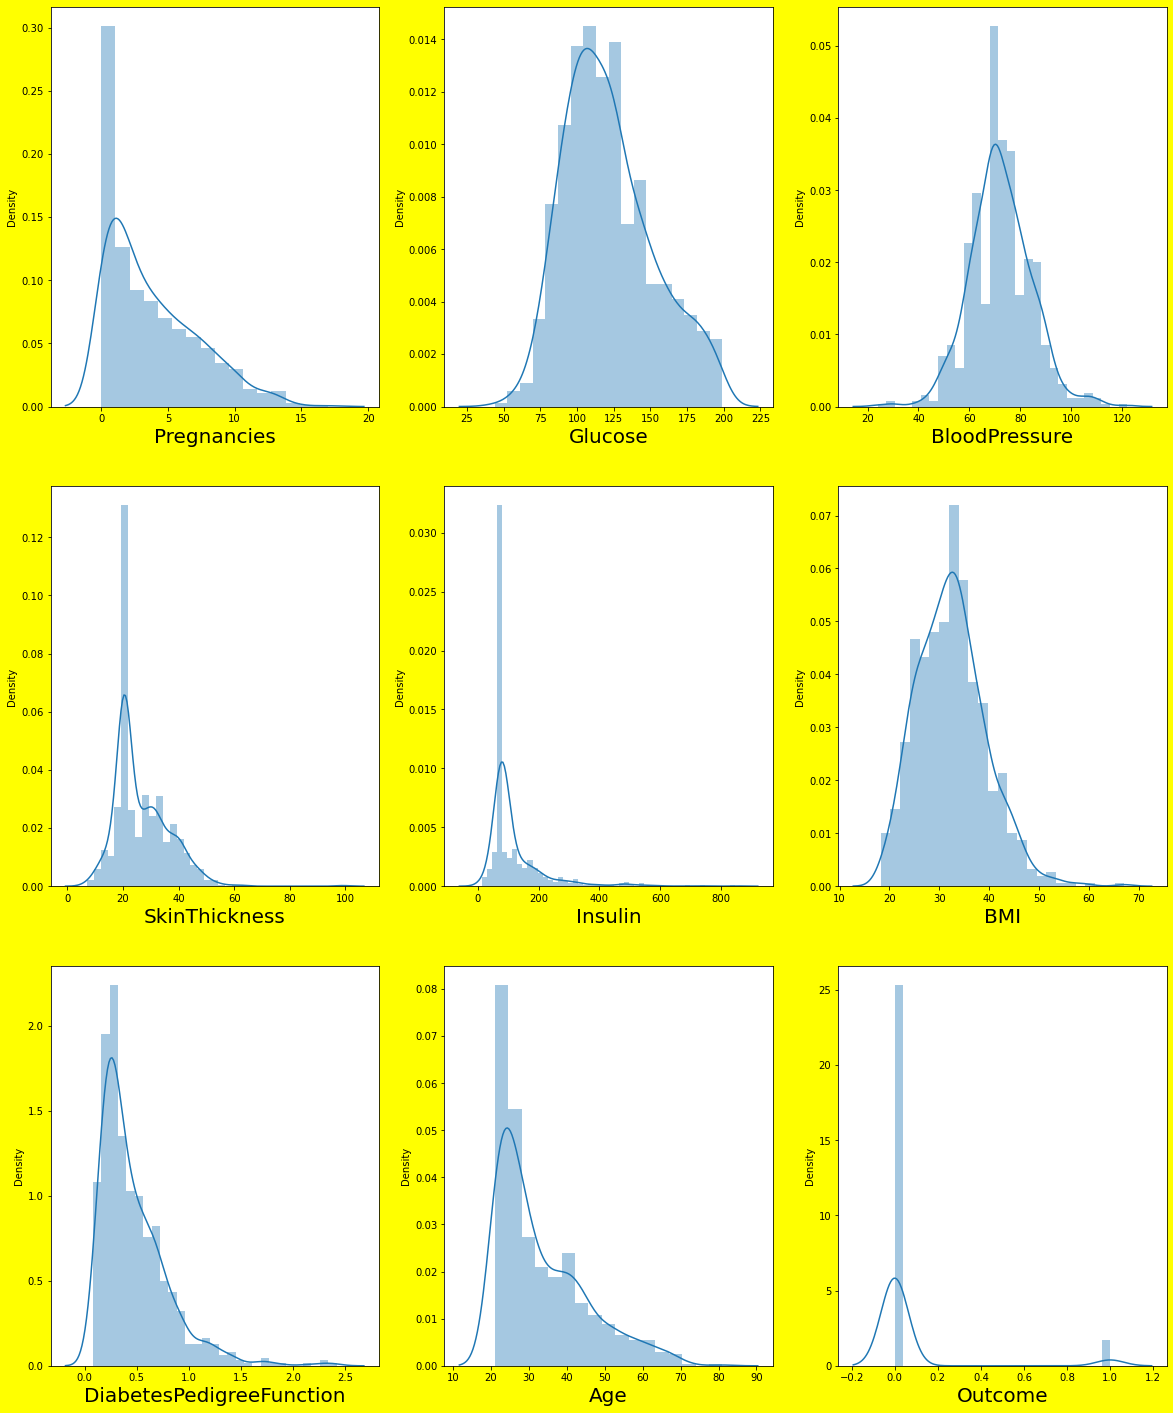

In [41]:
plt.figure(figsize=(20,25),facecolor='yellow')
plotnumber=1
for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# Apply log transform on contionus daa 

its primarily used to convert a skewed distribution to a normal distribution/less-skewed distribution. in this transform, we take the log of the values in a column and use these values as the column insted 

In [42]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [44]:
data['Insulin']=np.log(data['Insulin'])
data['BloodPressure']=np.log(data['BloodPressure'])
data['SkinThickness']=np.log(data['SkinThickness'])
data['BMI']=np.log(data['BMI'])
data['DiabetesPedigreeFunction']=np.log(data['DiabetesPedigreeFunction'])
data['Age']=np.log(data['Age'])

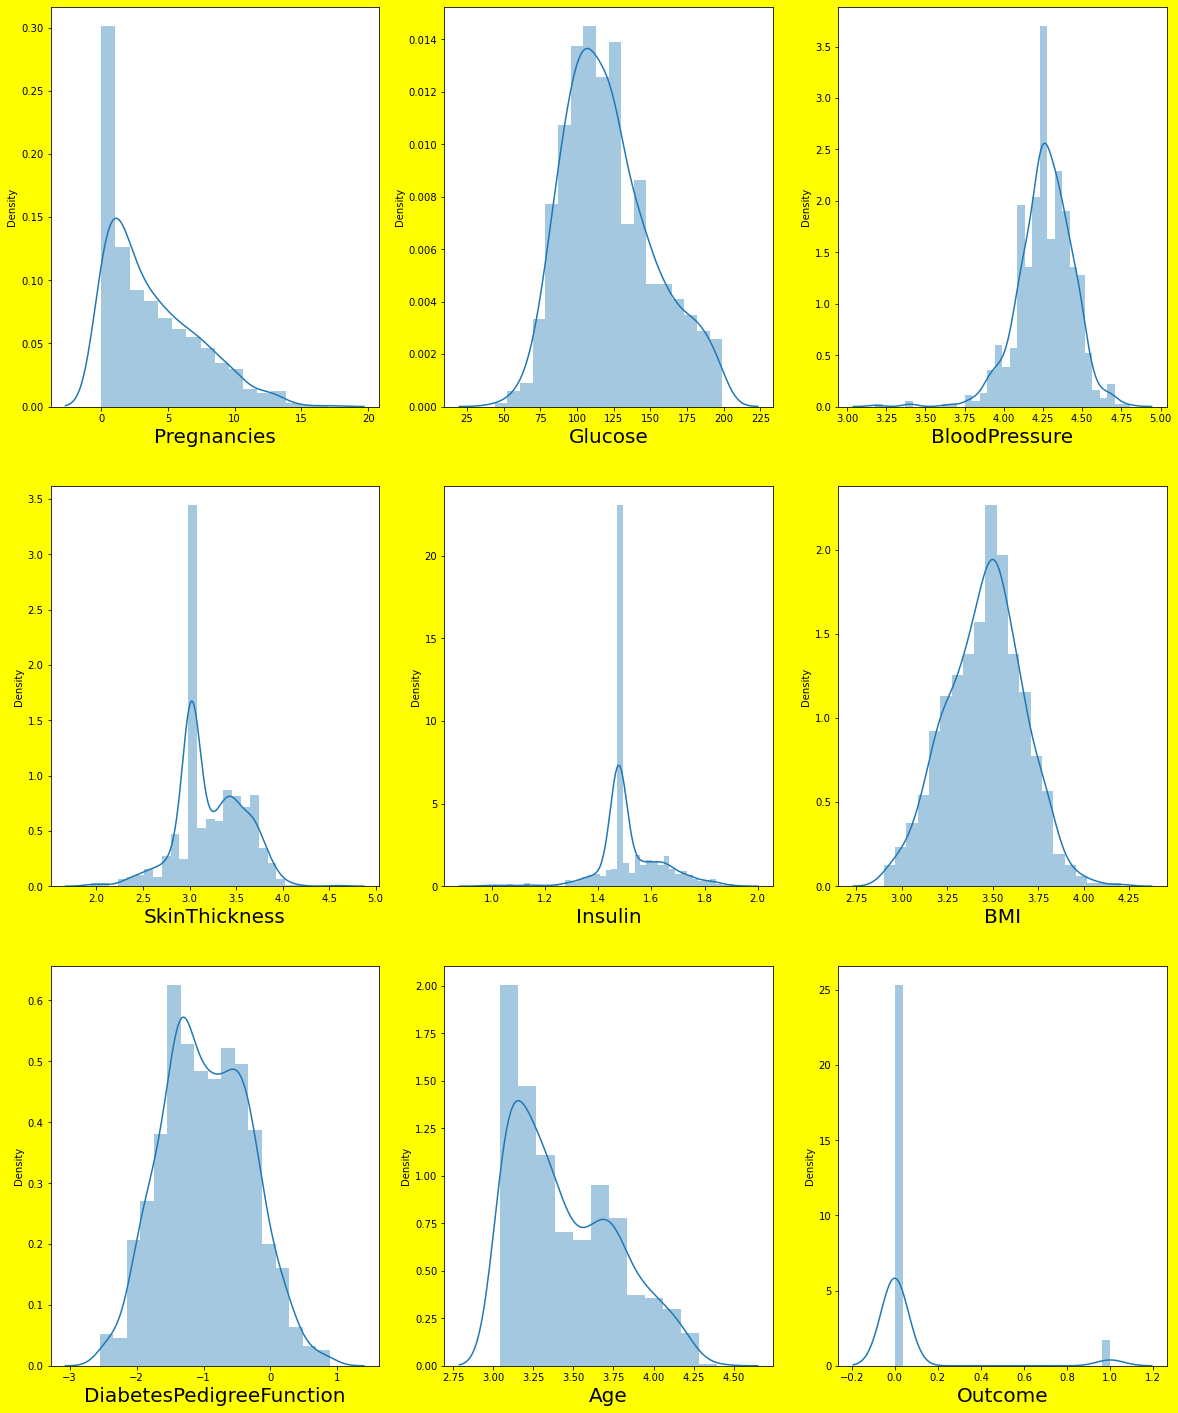

In [45]:
plt.figure(figsize=(20,25),facecolor='yellow')
plotnumber=1
for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# Power Tranformser
it is a data transformation technique used to stablize , make the data more normal distribution like

In [46]:
data['BMI']=data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())

In [47]:
features =['Insulin','BMI','BloodPressure','SkinThickness','Age']

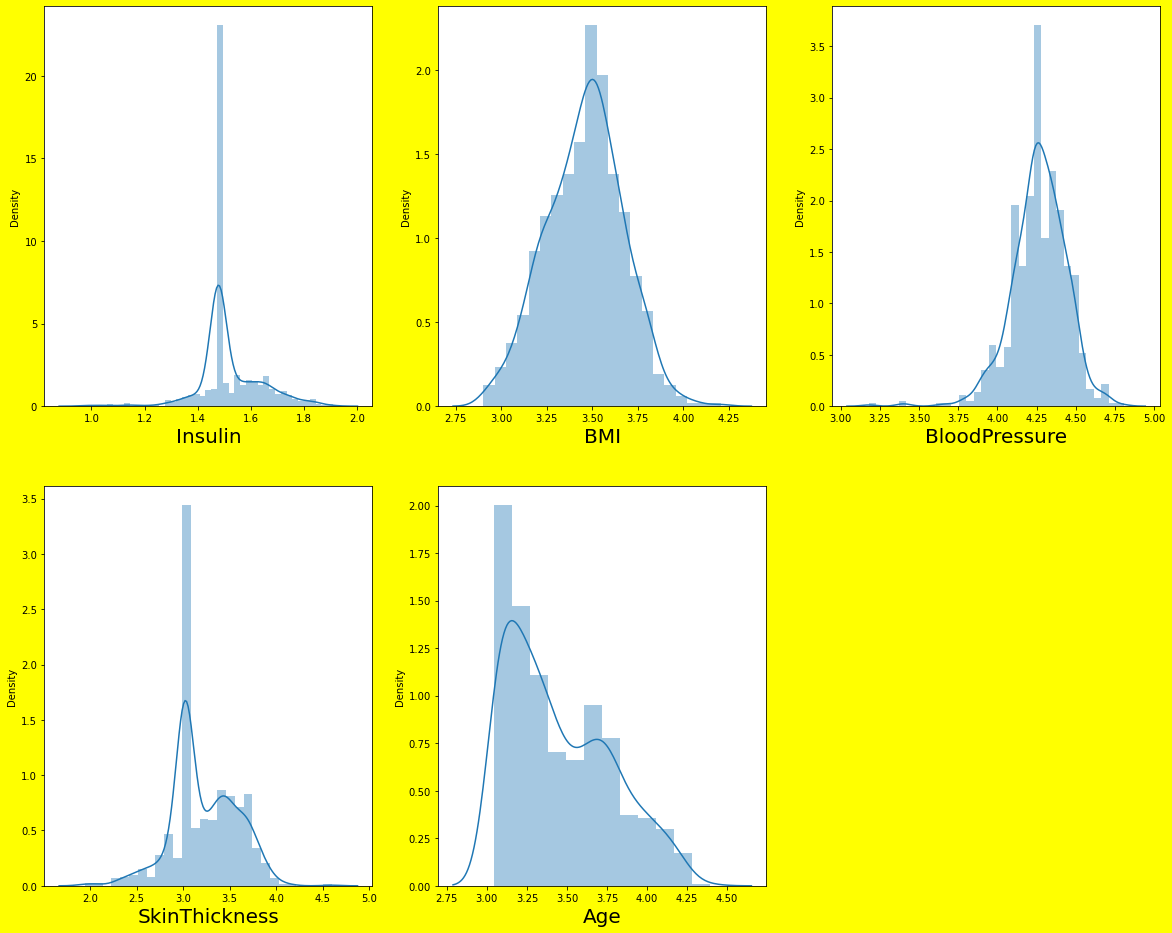

In [49]:
plt.figure(figsize=(20,25),facecolor='yellow')
plotnumber=1
for column in data[features]:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# box-cov works only with +ve value (>0)

Yeo-Johnnson works with both +,_ values

In [51]:
from sklearn.preprocessing import PowerTransformer

In [52]:
scaler=PowerTransformer(method='box-cox')

In [53]:
data[features]=scaler.fit_transform(data[features].values)

In [54]:
data[features]

,Insulin,BMI,BloodPressure,SkinThickness,Age
0,-0.361093,0.261979,-0.009420,0.957337,1.351836
1,-0.361093,-0.842015,-0.509650,0.414704,0.141547
2,-0.361093,-1.457877,-0.677676,-0.569792,0.243977
3,-0.043791,-0.584785,-0.509650,-0.248259,-1.506047
4,0.990643,1.462648,-2.735362,0.957337,0.339647
...,...,...,...,...,...
763,1.105214,0.161578,0.320789,1.877845,1.748005
764,-0.361093,0.697840,-0.175513,0.209617,-0.352856
765,0.282458,-0.912840,-0.009420,-0.248259,0.031599
766,-0.361093,-0.260632,-1.015587,-0.569792,1.228685


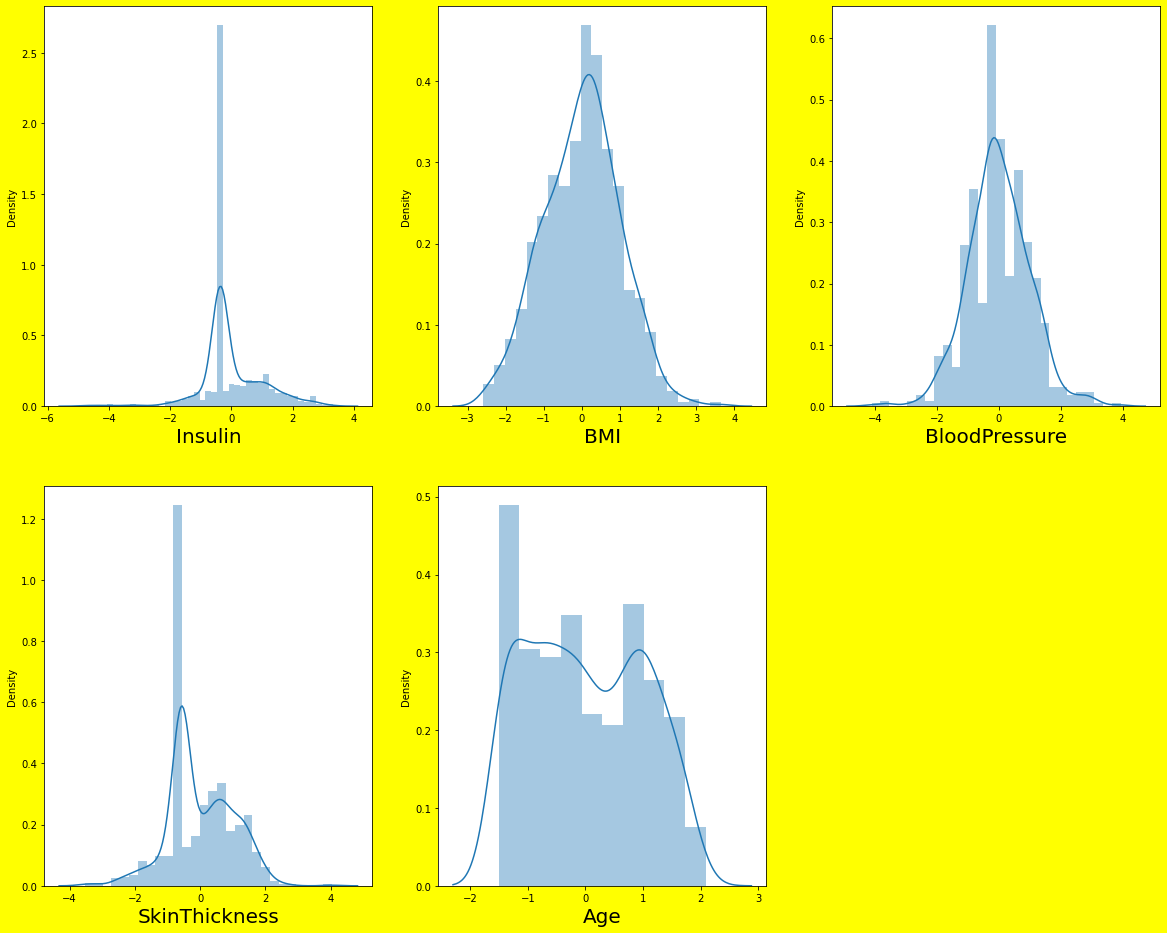

In [55]:
plt.figure(figsize=(20,25),facecolor='yellow')
plotnumber=1
for column in data[features]:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()